# 7. Extracting Information from Text

## 1   Information Extraction

In [12]:
>>> locs = [('Omnicom', 'IN', 'New York'),
...         ('DDB Needham', 'IN', 'New York'),
...         ('Kaplan Thaler Group', 'IN', 'New York'),
...         ('BBDO South', 'IN', 'Atlanta'),
...         ('Georgia-Pacific', 'IN', 'Atlanta')]
>>> query = [e1 for (e1, rel, e2) in locs if e2=='Atlanta']
>>> print(query)

['BBDO South', 'Georgia-Pacific']


### 1.1   Information Extraction Architecture

In [13]:
import nltk,re, pprint

In [14]:
>>> def ie_preprocess(document):
...    sentences = nltk.sent_tokenize(document) 
...    sentences = [nltk.word_tokenize(sent) for sent in sentences] 
...    sentences = [nltk.pos_tag(sent) for sent in sentences]

## 2   Chunking

### 2.1   Noun Phrase Chunking

In [15]:
>>> sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"),
... ("dog", "NN"), ("barked", "VBD"), ("at", "IN"),  ("the", "DT"), ("cat", "NN")]

>>> grammar = "NP: {<DT>?<JJ>*<NN>}" 
>>> cp = nltk.RegexpParser(grammar) 
>>> result = cp.parse(sentence) 
>>> print(result)

(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN))


### 2.3   Chunking with Regular Expressions

In [16]:
grammar = r"""
  NP: {<DT|PP\$>?<JJ>*<NN>}   # chunk determiner/possessive, adjectives and noun
      {<NNP>+}                # chunk sequences of proper nouns
"""
cp = nltk.RegexpParser(grammar)
sentence = [("Rapunzel", "NNP"), ("let", "VBD"), ("down", "RP"), 
                 ("her", "PP$"), ("long", "JJ"), ("golden", "JJ"), ("hair", "NN")]

In [17]:
>>> print(cp.parse(sentence))

(S
  (NP Rapunzel/NNP)
  let/VBD
  down/RP
  (NP her/PP$ long/JJ golden/JJ hair/NN))


In [18]:
>>> nouns = [("money", "NN"), ("market", "NN"), ("fund", "NN")]
>>> grammar = "NP: {<NN><NN>}  # Chunk two consecutive nouns"
>>> cp = nltk.RegexpParser(grammar)
>>> print(cp.parse(nouns))

(S (NP money/NN market/NN) fund/NN)


### 2.4   Exploring Text Corpora

In [19]:
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [20]:
>>> cp = nltk.RegexpParser('CHUNK: {<V.*> <TO> <V.*>}')
>>> brown = nltk.corpus.brown
>>> for sent in brown.tagged_sents():
...     tree = cp.parse(sent)
...     for subtree in tree.subtrees():
...         if subtree.label() == 'CHUNK': print(subtree)

(CHUNK combined/VBN to/TO achieve/VB)
(CHUNK continue/VB to/TO place/VB)
(CHUNK serve/VB to/TO protect/VB)
(CHUNK wanted/VBD to/TO wait/VB)
(CHUNK allowed/VBN to/TO place/VB)
(CHUNK expected/VBN to/TO become/VB)
(CHUNK expected/VBN to/TO approve/VB)
(CHUNK expected/VBN to/TO make/VB)
(CHUNK intends/VBZ to/TO make/VB)
(CHUNK seek/VB to/TO set/VB)
(CHUNK like/VB to/TO see/VB)
(CHUNK designed/VBN to/TO provide/VB)
(CHUNK get/VB to/TO hear/VB)
(CHUNK expects/VBZ to/TO tell/VB)
(CHUNK expected/VBN to/TO give/VB)
(CHUNK prefer/VB to/TO pay/VB)
(CHUNK required/VBN to/TO obtain/VB)
(CHUNK permitted/VBN to/TO teach/VB)
(CHUNK designed/VBN to/TO reduce/VB)
(CHUNK Asked/VBN to/TO elaborate/VB)
(CHUNK got/VBN to/TO go/VB)
(CHUNK raised/VBN to/TO pay/VB)
(CHUNK scheduled/VBN to/TO go/VB)
(CHUNK cut/VBN to/TO meet/VB)
(CHUNK needed/VBN to/TO meet/VB)
(CHUNK hastened/VBD to/TO add/VB)
(CHUNK found/VBN to/TO prevent/VB)
(CHUNK continue/VB to/TO insist/VB)
(CHUNK compelled/VBN to/TO make/VB)
(CHUNK mad

(CHUNK needs/VBZ to/TO feel/VB)
(CHUNK advanced/VBN to/TO argue/VB)
(CHUNK undertakes/VBZ to/TO fight/VB)
(CHUNK decided/VBD to/TO keep/VB)
(CHUNK advertising/VBG to/TO attract/VB)
(CHUNK wants/VBZ to/TO operate/VB)
(CHUNK varied/VBN to/TO provide/VB)
(CHUNK designed/VBN to/TO reduce/VB)
(CHUNK use/VB to/TO deny/VB)
(CHUNK combining/VBG to/TO lower/VB)
(CHUNK combining/VBG to/TO raise/VB)
(CHUNK intended/VBN to/TO effect/VB)
(CHUNK tend/VB to/TO convert/VB)
(CHUNK exist/VB to/TO raise/VB)
(CHUNK wish/VB to/TO prevent/VB)
(CHUNK wish/VB to/TO preserve/VB)
(CHUNK attempting/VBG to/TO extend/VB)
(CHUNK made/VBN to/TO take/VB)
(CHUNK continue/VB to/TO set/VB)
(CHUNK trying/VBG to/TO persuade/VB)
(CHUNK attempted/VBD to/TO take/VB)
(CHUNK decided/VBD to/TO break/VB)
(CHUNK braced/VBN to/TO move/VB)
(CHUNK needed/VBN to/TO keep/VB)
(CHUNK used/VBN to/TO carry/VB)
(CHUNK decided/VBD to/TO go/VB)
(CHUNK happens/VBZ to/TO benefit/VB)
(CHUNK attempted/VBD to/TO work/VB)
(CHUNK decided/VBD to/TO 

(CHUNK refusing/VBG to/TO show/VB)
(CHUNK seems/VBZ to/TO match/VB)
(CHUNK decided/VBD to/TO rake/VB)
(CHUNK entitled/VBN to/TO stay/VB)
(CHUNK bringing/VBG to/TO bear/VB)
(CHUNK beginning/VBG to/TO get/VB)
(CHUNK threaten/VB to/TO use/VB)
(CHUNK begin/VB to/TO play/VB)
(CHUNK begin/VB to/TO hunt/VB)
(CHUNK induced/VBN to/TO see/VB)
(CHUNK going/VBG to/TO hang/VB)
(CHUNK continue/VB to/TO test/VB)
(CHUNK choose/VB to/TO agree/VB)
(CHUNK chosen/VBN to/TO find/VB)
(CHUNK compelled/VBN to/TO conduct/VB)
(CHUNK need/VB to/TO realize/VB)
(CHUNK used/VBN to/TO justify/VB)
(CHUNK fail/VB to/TO respond/VB)
(CHUNK intends/VBZ to/TO economize/VB)
(CHUNK bound/VBN to/TO say/VB)
(CHUNK trying/VBG to/TO mollify/VB)
(CHUNK used/VBD to/TO say/VB)
(CHUNK came/VBD to/TO reassert/VB)
(CHUNK choose/VB to/TO call/VB)
(CHUNK intend/VB to/TO re-enter/VB)
(CHUNK conscripted/VBN to/TO enact/VB)
(CHUNK continues/VBZ to/TO feed/VB)
(CHUNK tried/VBD to/TO integrate/VB)
(CHUNK poised/VBN to/TO strike/VB)
(CHUNK t

(CHUNK wanted/VBD to/TO find/VB)
(CHUNK helps/VBZ to/TO meet/VB)
(CHUNK rejoiced/VBD to/TO see/VB)
(CHUNK began/VBD to/TO suspect/VB)
(CHUNK began/VBD to/TO review/VB)
(CHUNK called/VBD to/TO sit/VB)
(CHUNK began/VBD to/TO write/VB)
(CHUNK decided/VBD to/TO try/VB)
(CHUNK takes/VBZ to/TO tell/VB)
(CHUNK seemed/VBD to/TO widen/VB)
(CHUNK proceeded/VBD to/TO teach/VB)
(CHUNK helps/VBZ to/TO make/VB)
(CHUNK remember/VB to/TO make/VB)
(CHUNK supposed/VBN to/TO like/VB)
(CHUNK working/VBG to/TO improve/VB)
(CHUNK like/VB to/TO make/VB)
(CHUNK added/VBN to/TO encourage/VB)
(CHUNK like/VB to/TO shear/VB)
(CHUNK needs/VBZ to/TO tell/VB)
(CHUNK like/VB to/TO grow/VB)
(CHUNK allowed/VBN to/TO mature/VB)
(CHUNK used/VBN to/TO attack/VB)
(CHUNK continued/VBD to/TO threaten/VB)
(CHUNK decide/VB to/TO build/VB)
(CHUNK used/VBN to/TO destroy/VB)
(CHUNK going/VBG to/TO develop/VB)
(CHUNK put/VBN to/TO see/VB)
(CHUNK fail/VB to/TO develop/VB)
(CHUNK seem/VB to/TO fall/VB)
(CHUNK serve/VB to/TO emphasiz

(CHUNK began/VBD to/TO fall/VB)
(CHUNK begun/VBN to/TO write/VB)
(CHUNK made/VBN to/TO seem/VB)
(CHUNK attempting/VBG to/TO direct/VB)
(CHUNK pleased/VBN to/TO call/VB)
(CHUNK scheduled/VBN to/TO nominate/VB)
(CHUNK come/VB to/TO spend/VB)
(CHUNK managed/VBD to/TO irrigate/VB)
(CHUNK stooped/VBD to/TO scoop/VB)
(CHUNK fall/VB to/TO show/VB)
(CHUNK try/VB to/TO push/VB)
(CHUNK begins/VBZ to/TO deteriorate/VB)
(CHUNK used/VBD to/TO like/VB)
(CHUNK offered/VBD to/TO ship/VB)
(CHUNK hopes/VBZ to/TO find/VB)
(CHUNK invented/VBN to/TO hold/VB)
(CHUNK learn/VB to/TO like/VB)
(CHUNK labored/VBD to/TO set/VB)
(CHUNK set/VBN to/TO receive/VB)
(CHUNK entered/VBN to/TO compete/VB)
(CHUNK seem/VB to/TO make/VB)
(CHUNK seemed/VBD to/TO answer/VB)
(CHUNK decided/VBD to/TO use/VB)
(CHUNK began/VBD to/TO show/VB)
(CHUNK Wishing/VBG to/TO show/VB)
(CHUNK learned/VBD to/TO set/VB)
(CHUNK forced/VBN to/TO fly/VB)
(CHUNK hope/VB to/TO break/VB)
(CHUNK came/VBD to/TO recognize/VB)
(CHUNK turning/VBG to/TO c

(CHUNK ceased/VBD to/TO look/VB)
(CHUNK manages/VBZ to/TO overlook/VB)
(CHUNK troubled/VBN to/TO read/VB)
(CHUNK destined/VBN to/TO go/VB)
(CHUNK expected/VBD to/TO go/VB)
(CHUNK used/VBD to/TO characterize/VB)
(CHUNK helping/VBG to/TO raise/VB)
(CHUNK decided/VBD to/TO stay/VB)
(CHUNK used/VBD to/TO refer/VB)
(CHUNK needs/VBZ to/TO educate/VB)
(CHUNK tended/VBN to/TO tamp/VB)
(CHUNK like/VB to/TO underline/VB)
(CHUNK begun/VBN to/TO falter/VB)
(CHUNK intend/VB to/TO include/VB)
(CHUNK wish/VB to/TO improve/VB)
(CHUNK try/VB to/TO take/VB)
(CHUNK prefers/VBZ to/TO designate/VB)
(CHUNK want/VB to/TO join/VB)
(CHUNK seeking/VBG to/TO increase/VB)
(CHUNK used/VBN to/TO make/VB)
(CHUNK used/VBN to/TO make/VB)
(CHUNK inclined/VBN to/TO remain/VB)
(CHUNK heard/VBN to/TO say/VB)
(CHUNK stopped/VBN to/TO receive/VB)
(CHUNK used/VBN to/TO describe/VB)
(CHUNK claimed/VBD to/TO own/VB)
(CHUNK tried/VBD to/TO find/VB)
(CHUNK meant/VBD to/TO pay/VB)
(CHUNK given/VBN to/TO go/VB)
(CHUNK wanted/VBD t

(CHUNK permitted/VBN to/TO return/VB)
(CHUNK attempted/VBN to/TO make/VB)
(CHUNK prepared/VBN to/TO demonstrate/VB)
(CHUNK calculated/VBN to/TO suggest/VB)
(CHUNK seemed/VBD to/TO disconcert/VB)
(CHUNK known/VBN to/TO make/VB)
(CHUNK going/VBG to/TO talk/VB)
(CHUNK learns/VBZ to/TO focus/VB)
(CHUNK chooses/VBZ to/TO subordinate/VB)
(CHUNK wish/VB to/TO preserve/VB)
(CHUNK cease/VB to/TO exist/VB)
(CHUNK seem/VB to/TO constitute/VB)
(CHUNK destined/VBN to/TO fail/VB)
(CHUNK wants/VBZ to/TO get/VB)
(CHUNK began/VBD to/TO understand/VB)
(CHUNK wanted/VBD to/TO capture/VB)
(CHUNK liked/VBD to/TO tell/VB)
(CHUNK decided/VBD to/TO migrate/VB)
(CHUNK continued/VBD to/TO trouble/VB)
(CHUNK labored/VBD to/TO finish/VB)
(CHUNK decided/VBD to/TO return/VB)
(CHUNK waiting/VBG to/TO go/VB)
(CHUNK chosen/VBN to/TO serve/VB)
(CHUNK came/VBD to/TO know/VB)
(CHUNK helped/VBN to/TO escape/VB)
(CHUNK opened/VBN to/TO admit/VB)
(CHUNK happened/VBD to/TO see/VB)
(CHUNK brought/VBN to/TO bear/VB)
(CHUNK inc

(CHUNK continued/VBD to/TO shape/VB)
(CHUNK seem/VB to/TO pass/VB)
(CHUNK prepared/VBN to/TO accept/VB)
(CHUNK done/VBN to/TO obtaine/VB)
(CHUNK expected/VBN to/TO reach/VB)
(CHUNK seems/VBZ to/TO refer/VB)
(CHUNK tried/VBD to/TO consult/VB)
(CHUNK came/VBD to/TO put/VB)
(CHUNK seemed/VBN to/TO promise/VB)
(CHUNK needed/VBD to/TO possess/VB)
(CHUNK seem/VB to/TO indicate/VB)
(CHUNK purports/VBZ to/TO examine/VB)
(CHUNK attempts/VBZ to/TO understand/VB)
(CHUNK tend/VB to/TO disprove/VB)
(CHUNK forced/VBN to/TO admit/VB)
(CHUNK attempt/VB to/TO ascertain/VB)
(CHUNK forced/VBN to/TO demonstrate/VB)
(CHUNK sought/VBD to/TO maintain/VB)
(CHUNK determined/VBN to/TO resist/VB)
(CHUNK compelled/VBN to/TO make/VB)
(CHUNK threatening/VBG to/TO murder/VB)
(CHUNK agreed/VBD to/TO see/VB)
(CHUNK learned/VBN to/TO know/VB)
(CHUNK written/VBN to/TO say/VB)
(CHUNK came/VBD to/TO see/VB)
(CHUNK liked/VBD to/TO think/VB)
(CHUNK chosen/VBN to/TO follow/VB)
(CHUNK went/VBD to/TO see/VB)
(CHUNK forced/VBN 

(CHUNK helping/VBG to/TO strengthen/VB)
(CHUNK began/VBD to/TO ship/VB)
(CHUNK believed/VBN to/TO provide/VB)
(CHUNK designed/VBN to/TO provide/VB)
(CHUNK expect/VB to/TO make/VB)
(CHUNK developed/VBN to/TO facilitate/VB)
(CHUNK set/VBN to/TO hold/VB)
(CHUNK continuing/VBG to/TO carry/VB)
(CHUNK designed/VBN to/TO increase/VB)
(CHUNK improved/VBN to/TO obtain/VB)
(CHUNK purchased/VBN to/TO permit/VB)
(CHUNK extended/VBN to/TO provide/VB)
(CHUNK sought/VBN to/TO meet/VB)
(CHUNK designed/VBN to/TO handle/VB)
(CHUNK invited/VBN to/TO participate/VB)
(CHUNK planned/VBN to/TO provide/VB)
(CHUNK inclined/VBN to/TO advance/VB)
(CHUNK aims/VBZ to/TO give/VB)
(CHUNK wish/VB to/TO pursue/VB)
(CHUNK expected/VBN to/TO increase/VB)
(CHUNK expected/VBN to/TO exceed/VB)
(CHUNK begun/VBN to/TO make/VB)
(CHUNK continues/VBZ to/TO expand/VB)
(CHUNK began/VBD to/TO make/VB)
(CHUNK need/VB to/TO learn/VB)
(CHUNK working/VBG to/TO attain/VB)
(CHUNK begun/VBN to/TO translate/VB)
(CHUNK besieged/VBN to/TO s

(CHUNK trying/VBG to/TO marry/VB)
(CHUNK pledged/VBN to/TO hold/VB)
(CHUNK determined/VBN to/TO create/VB)
(CHUNK seemed/VBD to/TO assure/VB)
(CHUNK attempted/VBD to/TO marry/VB)
(CHUNK obliged/VBN to/TO concede/VB)
(CHUNK expected/VBD to/TO democratize/VB)
(CHUNK Failing/VBG to/TO heed/VB)
(CHUNK determined/VBN to/TO keep/VB)
(CHUNK tend/VB to/TO procrastinate/VB)
(CHUNK even/VB to/TO repudiate/VB)
(CHUNK served/VBD to/TO minimize/VB)
(CHUNK encouraged/VBN to/TO state/VB)
(CHUNK trying/VBG to/TO unearth/VB)
(CHUNK decided/VBD to/TO remove/VB)
(CHUNK decide/VB to/TO encourage/VB)
(CHUNK prefer/VB to/TO hire/VB)
(CHUNK go/VB to/TO work/VB)
(CHUNK intended/VBN to/TO provide/VB)
(CHUNK continues/VBZ to/TO stress/VB)
(CHUNK encouraged/VBN to/TO adopt/VB)
(CHUNK motivated/VBN to/TO take/VB)
(CHUNK expected/VBN to/TO respond/VB)
(CHUNK training/VBG to/TO meet/VB)
(CHUNK used/VBN to/TO pay/VB)
(CHUNK taken/VBN to/TO indicate/VB)
(CHUNK afford/VB to/TO trade/VB)
(CHUNK afford/VB to/TO lose/VB)

(CHUNK wanted/VBD to/TO tell/VB)
(CHUNK wanted/VBD to/TO substitute/VB)
(CHUNK want/VB to/TO make/VB)
(CHUNK come/VBN to/TO determine/VB)
(CHUNK begun/VBN to/TO ebb/VB)
(CHUNK intended/VBN to/TO incorporate/VB)
(CHUNK led/VBN to/TO postulate/VB)
(CHUNK hope/VB to/TO discover/VB)
(CHUNK tended/VBN to/TO emphasize/VB)
(CHUNK fails/VBZ to/TO explore/VB)
(CHUNK seeks/VBZ to/TO make/VB)
(CHUNK helping/VBG to/TO define/VB)
(CHUNK trying/VBG to/TO avoid/VB)
(CHUNK trying/VBG to/TO get/VB)
(CHUNK made/VBN to/TO symbolize/VB)
(CHUNK kneels/VBZ to/TO kiss/VB)
(CHUNK serve/VB to/TO travesty/VB)
(CHUNK used/VBN to/TO equate/VB)
(CHUNK altered/VBN to/TO show/VB)
(CHUNK altered/VBN to/TO show/VB)
(CHUNK taken/VBN to/TO branch/VB)
(CHUNK attempt/VB to/TO execute/VB)
(CHUNK used/VBN to/TO name/VB)
(CHUNK used/VBN to/TO name/VB)
(CHUNK used/VBN to/TO generate/VB)
(CHUNK used/VBN to/TO select/VB)
(CHUNK used/VBN to/TO select/VB)
(CHUNK used/VBN to/TO specify/VB)
(CHUNK used/VBN to/TO specify/VB)
(CHUNK 

(CHUNK want/VB to/TO see/VB)
(CHUNK beginning/VBG to/TO see/VB)
(CHUNK bother/VB to/TO wipe/VB)
(CHUNK fit/VBN to/TO shake/VB)
(CHUNK going/VBG to/TO wake/VB)
(CHUNK care/VB to/TO get/VB)
(CHUNK tried/VBN to/TO stop/VB)
(CHUNK expected/VBD to/TO hear/VB)
(CHUNK got/VBD to/TO expect/VB)
(CHUNK going/VBG to/TO put/VB)
(CHUNK got/VBN to/TO thaw/VB)
(CHUNK want/VB to/TO touch/VB)
(CHUNK made/VBN to/TO fall/VB)
(CHUNK come/VB to/TO rest/VB)
(CHUNK trying/VBG to/TO attain/VB)
(CHUNK stopped/VBD to/TO gaze/VB)
(CHUNK begun/VBN to/TO turn/VB)
(CHUNK beginning/VBG to/TO cook/VB)
(CHUNK began/VBD to/TO develop/VB)
(CHUNK begun/VBN to/TO buy/VB)
(CHUNK want/VB to/TO thin/VB)
(CHUNK planned/VBD to/TO graduate/VB)
(CHUNK going/VBG to/TO tell/VB)
(CHUNK trying/VBG to/TO get/VB)
(CHUNK want/VB to/TO roast/VB)
(CHUNK preferred/VBD to/TO sit/VB)
(CHUNK liked/VBD to/TO sit/VB)
(CHUNK seemed/VBN to/TO come/VB)
(CHUNK plan/VB to/TO conduct/VB)
(CHUNK required/VBN to/TO detect/VB)
(CHUNK obliged/VBN to/TO 

(CHUNK get/VB to/TO work/VB)
(CHUNK come/VBN to/TO work/VB)
(CHUNK want/VB to/TO see/VB)
(CHUNK wanted/VBD to/TO get/VB)
(CHUNK want/VB to/TO go/VB)
(CHUNK managed/VBD to/TO swallow/VB)
(CHUNK threatened/VBD to/TO fire/VB)
(CHUNK happen/VB to/TO see/VB)
(CHUNK going/VBG to/TO eat/VB)
(CHUNK began/VBD to/TO weep/VB)
(CHUNK happens/VBZ to/TO ask/VB)
(CHUNK want/VB to/TO rent/VB)
(CHUNK Try/VB to/TO imagine/VB)
(CHUNK promised/VBN to/TO pay/VB)
(CHUNK planning/VBG to/TO remarry/VB)
(CHUNK determined/VBN to/TO get/VB)
(CHUNK seemed/VBD to/TO swell/VB)
(CHUNK surprised/VBN to/TO meet/VB)
(CHUNK trying/VBG to/TO tell/VB)
(CHUNK known/VBN to/TO run/VB)
(CHUNK seem/VB to/TO preserve/VB)
(CHUNK got/VBD to/TO understand/VB)
(CHUNK got/VBN to/TO know/VB)
(CHUNK came/VBD to/TO ask/VB)
(CHUNK asked/VBD to/TO see/VB)
(CHUNK began/VBD to/TO abuse/VB)
(CHUNK hurry/VB to/TO hang/VB)
(CHUNK seemed/VBD to/TO mind/VB)
(CHUNK started/VBD to/TO cross/VB)
(CHUNK started/VBD to/TO curse/VB)
(CHUNK offering/VB

(CHUNK rejoicing/VBG to/TO think/VB)
(CHUNK like/VB to/TO get/VB)
(CHUNK tried/VBD to/TO go/VB)
(CHUNK seemed/VBD to/TO make/VB)
(CHUNK aim/VB to/TO give/VB)
(CHUNK want/VB to/TO trade/VB)
(CHUNK beginning/VBG to/TO turn/VB)
(CHUNK forced/VBN to/TO maintain/VB)
(CHUNK hope/VB to/TO locate/VB)
(CHUNK paused/VBD to/TO gather/VB)
(CHUNK bothering/VBG to/TO note/VB)
(CHUNK turned/VBD to/TO survey/VB)
(CHUNK started/VBD to/TO struggle/VB)
(CHUNK started/VBD to/TO return/VB)
(CHUNK pretended/VBN to/TO give/VB)
(CHUNK served/VBD to/TO increase/VB)
(CHUNK determined/VBN to/TO drive/VB)
(CHUNK try/VB to/TO go/VB)
(CHUNK began/VBD to/TO run/VB)
(CHUNK continued/VBD to/TO come/VB)
(CHUNK continued/VBN to/TO camouflage/VB)
(CHUNK Forced/VBN to/TO realize/VB)
(CHUNK trying/VBG to/TO grab/VB)
(CHUNK trying/VBG to/TO read/VB)
(CHUNK began/VBD to/TO drink/VB)
(CHUNK started/VBD to/TO slide/VB)
(CHUNK mean/VB to/TO pry/VB)
(CHUNK going/VBG to/TO sell/VB)
(CHUNK pleased/VBN to/TO hear/VB)
(CHUNK startin

(CHUNK liked/VBD to/TO hear/VB)
(CHUNK tempted/VBN to/TO tell/VB)
(CHUNK seemed/VBD to/TO mark/VB)
(CHUNK tried/VBD to/TO explain/VB)
(CHUNK managed/VBD to/TO look/VB)
(CHUNK needed/VBD to/TO get/VB)
(CHUNK answered/VBD to/TO find/VB)
(CHUNK afford/VB to/TO get/VB)
(CHUNK started/VBD to/TO look/VB)
(CHUNK takes/VBZ to/TO get/VB)
(CHUNK going/VBG to/TO get/VB)
(CHUNK tried/VBD to/TO quiet/VB)
(CHUNK trying/VBG to/TO sound/VB)
(CHUNK came/VBD to/TO meet/VB)
(CHUNK seemed/VBD to/TO focus/VB)
(CHUNK want/VB to/TO talk/VB)
(CHUNK want/VB to/TO see/VB)
(CHUNK wants/VBZ to/TO get/VB)
(CHUNK went/VBD to/TO turn/VB)
(CHUNK surprised/VBN to/TO find/VB)
(CHUNK want/VB to/TO stay/VB)
(CHUNK going/VBG to/TO make/VB)
(CHUNK hoped/VBD to/TO dig/VB)
(CHUNK trying/VBG to/TO make/VB)
(CHUNK going/VBG to/TO lug/VB)
(CHUNK surprised/VBN to/TO see/VB)
(CHUNK stop/VB to/TO read/VB)
(CHUNK intended/VBD to/TO move/VB)
(CHUNK rising/VBG to/TO sting/VB)
(CHUNK arranged/VBN to/TO live/VB)
(CHUNK managed/VBN to/T

### 2.5   Chinking

In [21]:
grammar = r"""
  NP:
    {<.*>+}          # Chunk everything
    }<VBD|IN>+{      # Chink sequences of VBD and IN
  """
sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"),
       ("dog", "NN"), ("barked", "VBD"), ("at", "IN"),  ("the", "DT"), ("cat", "NN")]
cp = nltk.RegexpParser(grammar)

In [22]:
	
>>> print(cp.parse(sentence))

(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN))


## 3   Developing and Evaluating Chunkers

### 3.1   Reading IOB Format and the CoNLL 2000 Corpus

In [23]:
>>> text = '''
... he PRP B-NP
... accepted VBD B-VP
... the DT B-NP
... position NN I-NP
... of IN B-PP
... vice NN B-NP
... chairman NN I-NP
... of IN B-PP
... Carlyle NNP B-NP
... Group NNP I-NP
... , , O
... a DT B-NP
... merchant NN I-NP
... banking NN I-NP
... concern NN I-NP
... . . O
... '''
>>> nltk.chunk.conllstr2tree(text, chunk_types=['NP']).draw()

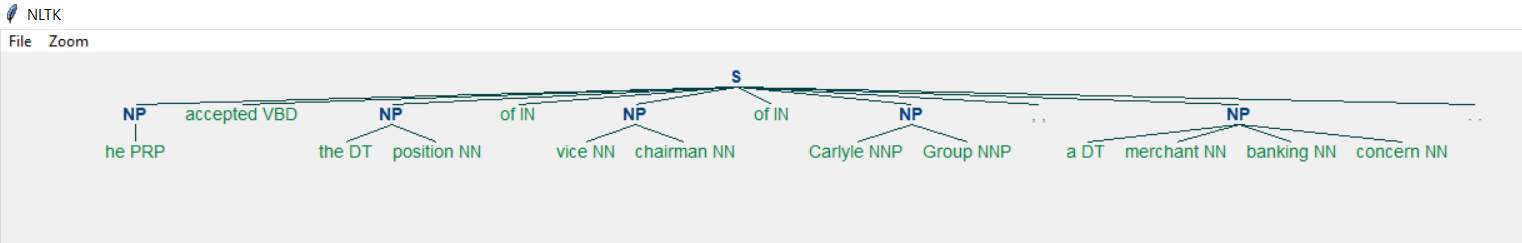

In [24]:
nltk.download('conll2000')

[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!


True

In [25]:
>>> from nltk.corpus import conll2000
>>> print(conll2000.chunked_sents('train.txt')[99])

(S
  (PP Over/IN)
  (NP a/DT cup/NN)
  (PP of/IN)
  (NP coffee/NN)
  ,/,
  (NP Mr./NNP Stone/NNP)
  (VP told/VBD)
  (NP his/PRP$ story/NN)
  ./.)


In [26]:
>>> print(conll2000.chunked_sents('train.txt', chunk_types=['NP'])[99])

(S
  Over/IN
  (NP a/DT cup/NN)
  of/IN
  (NP coffee/NN)
  ,/,
  (NP Mr./NNP Stone/NNP)
  told/VBD
  (NP his/PRP$ story/NN)
  ./.)


### 3.2   Simple Evaluation and Baselines

In [27]:
>>> from nltk.corpus import conll2000
>>> cp = nltk.RegexpParser("")
>>> test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
>>> print(cp.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  43.4%%
    Precision:      0.0%%
    Recall:         0.0%%
    F-Measure:      0.0%%


In [28]:
>>> grammar = r"NP: {<[CDJNP].*>+}"
>>> cp = nltk.RegexpParser(grammar)
>>> print(cp.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  87.7%%
    Precision:     70.6%%
    Recall:        67.8%%
    F-Measure:     69.2%%


In [29]:
class UnigramChunker(nltk.ChunkParserI):
    def __init__(self, train_sents): 
        train_data = [[(t,c) for w,t,c in nltk.chunk.tree2conlltags(sent)]
                      for sent in train_sents]
        self.tagger = nltk.UnigramTagger(train_data) 

    def parse(self, sentence): 
        pos_tags = [pos for (word,pos) in sentence]
        tagged_pos_tags = self.tagger.tag(pos_tags)
        chunktags = [chunktag for (pos, chunktag) in tagged_pos_tags]
        conlltags = [(word, pos, chunktag) for ((word,pos),chunktag)
                     in zip(sentence, chunktags)]
        return nltk.chunk.conlltags2tree(conlltags)

In [30]:
>>> test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
>>> train_sents = conll2000.chunked_sents('train.txt', chunk_types=['NP'])
>>> unigram_chunker = UnigramChunker(train_sents)
>>> print(unigram_chunker.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  92.9%%
    Precision:     79.9%%
    Recall:        86.8%%
    F-Measure:     83.2%%


In [31]:
>>> postags = sorted(set(pos for sent in train_sents
...                      for (word,pos) in sent.leaves()))
>>> print(unigram_chunker.tagger.tag(postags))

[('#', 'B-NP'), ('$', 'B-NP'), ("''", 'O'), ('(', 'O'), (')', 'O'), (',', 'O'), ('.', 'O'), (':', 'O'), ('CC', 'O'), ('CD', 'I-NP'), ('DT', 'B-NP'), ('EX', 'B-NP'), ('FW', 'I-NP'), ('IN', 'O'), ('JJ', 'I-NP'), ('JJR', 'B-NP'), ('JJS', 'I-NP'), ('MD', 'O'), ('NN', 'I-NP'), ('NNP', 'I-NP'), ('NNPS', 'I-NP'), ('NNS', 'I-NP'), ('PDT', 'B-NP'), ('POS', 'B-NP'), ('PRP', 'B-NP'), ('PRP$', 'B-NP'), ('RB', 'O'), ('RBR', 'O'), ('RBS', 'B-NP'), ('RP', 'O'), ('SYM', 'O'), ('TO', 'O'), ('UH', 'O'), ('VB', 'O'), ('VBD', 'O'), ('VBG', 'O'), ('VBN', 'O'), ('VBP', 'O'), ('VBZ', 'O'), ('WDT', 'B-NP'), ('WP', 'B-NP'), ('WP$', 'B-NP'), ('WRB', 'O'), ('``', 'O')]


In [32]:
class BigramChunker(nltk.ChunkParserI):
    def __init__(self, train_sents): 
        train_data = [[(t,c) for w,t,c in nltk.chunk.tree2conlltags(sent)]
                      for sent in train_sents]
        self.tagger = nltk.BigramTagger(train_data) 

    def parse(self, sentence): 
        pos_tags = [pos for (word,pos) in sentence]
        tagged_pos_tags = self.tagger.tag(pos_tags)
        chunktags = [chunktag for (pos, chunktag) in tagged_pos_tags]
        conlltags = [(word, pos, chunktag) for ((word,pos),chunktag)
                     in zip(sentence, chunktags)]
        return nltk.chunk.conlltags2tree(conlltags)

In [33]:
>>> bigram_chunker = BigramChunker(train_sents)
>>> print(bigram_chunker.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  93.3%%
    Precision:     82.3%%
    Recall:        86.8%%
    F-Measure:     84.5%%


### 3.3   Training Classifier-Based Chunkers

In [34]:
class ConsecutiveNPChunkTagger(nltk.TaggerI): 

    def __init__(self, train_sents):
        train_set = []
        for tagged_sent in train_sents:
            untagged_sent = nltk.tag.untag(tagged_sent)
            history = []
            for i, (word, tag) in enumerate(tagged_sent):
                featureset = npchunk_features(untagged_sent, i, history) 
                train_set.append( (featureset, tag) )
                history.append(tag)
        self.classifier = nltk.MaxentClassifier.train( 
            train_set, algorithm='megam', trace=0)

    def tag(self, sentence):
        history = []
        for i, word in enumerate(sentence):
            featureset = npchunk_features(sentence, i, history)
            tag = self.classifier.classify(featureset)
            history.append(tag)
        return zip(sentence, history)

class ConsecutiveNPChunker(nltk.ChunkParserI): 
    def __init__(self, train_sents):
        tagged_sents = [[((w,t),c) for (w,t,c) in
                         nltk.chunk.tree2conlltags(sent)]
                        for sent in train_sents]
        self.tagger = ConsecutiveNPChunkTagger(tagged_sents)

    def parse(self, sentence):
        tagged_sents = self.tagger.tag(sentence)
        conlltags = [(w,t,c) for ((w,t),c) in tagged_sents]
        return nltk.chunk.conlltags2tree(conlltags)

In [35]:

def demo():
    import nltk
    try:
        nltk.config_megam('path/to/megam')
        trainer = lambda x: nltk.MaxentClassifier.train(x, 'megam')
    except ValueError:
        try:
            trainer = lambda x: nltk.MaxentClassifier.train(x, 'BFGS')
        except ValueError:
            trainer = nltk.MaxentClassifier.train
    nltk.classify.rte_classifier(trainer) 



In [36]:
import nltk
nltk.config_megam('D:\KUCE\course_materials\8th_sem\COMP_473_Speech_and_Language_Processing\Speech-and-Language-Processing-Course-Materials\Lab\Lab7\megam.exe')

In [37]:
>>> def npchunk_features(sentence, i, history):
...     word, pos = sentence[i]
...     return {"pos": pos}
>>> chunker = ConsecutiveNPChunker(train_sents)
>>> print(chunker.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  92.9%%
    Precision:     79.9%%
    Recall:        86.7%%
    F-Measure:     83.2%%


In [38]:
>>> def npchunk_features(sentence, i, history):
...     word, pos = sentence[i]
...     if i == 0:
...         prevword, prevpos = "<START>", "<START>"
...     else:
...         prevword, prevpos = sentence[i-1]
...     return {"pos": pos, "prevpos": prevpos}
>>> chunker = ConsecutiveNPChunker(train_sents)
>>> print(chunker.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  93.6%%
    Precision:     81.9%%
    Recall:        87.1%%
    F-Measure:     84.4%%


In [39]:
>>> def npchunk_features(sentence, i, history):
...     word, pos = sentence[i]
...     if i == 0:
...         prevword, prevpos = "<START>", "<START>"
...     else:
...         prevword, prevpos = sentence[i-1]
...     return {"pos": pos, "word": word, "prevpos": prevpos}
>>> chunker = ConsecutiveNPChunker(train_sents)
>>> print(chunker.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  94.1%%
    Precision:     82.9%%
    Recall:        87.9%%
    F-Measure:     85.3%%


In [40]:
>>> def npchunk_features(sentence, i, history):
...     word, pos = sentence[i]
...     if i == 0:
...         prevword, prevpos = "<START>", "<START>"
...     else:
...         prevword, prevpos = sentence[i-1]
...     if i == len(sentence)-1:
...         nextword, nextpos = "<END>", "<END>"
...     else:
...         nextword, nextpos = sentence[i+1]
...     return {"pos": pos,
...             "word": word,
...             "prevpos": prevpos,
...             "nextpos": nextpos,
...             "prevpos+pos": "%s+%s" % (prevpos, pos),  
...             "pos+nextpos": "%s+%s" % (pos, nextpos),
...             "tags-since-dt": tags_since_dt(sentence, i)} 

In [41]:
>>> def tags_since_dt(sentence, i):
...     tags = set()
...     for word, pos in sentence[:i]:
...         if pos == 'DT':
...             tags = set()
...         else:
...             tags.add(pos)
...     return '+'.join(sorted(tags))

In [42]:
>>> chunker = ConsecutiveNPChunker(train_sents)
>>> print(chunker.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  96.0%%
    Precision:     88.8%%
    Recall:        91.1%%
    F-Measure:     89.9%%


## 4   Recursion in Linguistic Structure

### 4.1   Building Nested Structure with Cascaded Chunkers

In [51]:
grammar = r"""
  NP: {<DT|JJ|NN.*>+}          # Chunk sequences of DT, JJ, NN
  PP: {<IN><NP>}               # Chunk prepositions followed by NP
  VP: {<VB.*><NP|PP|CLAUSE>+$} # Chunk verbs and their arguments
  CLAUSE: {<NP><VP>}           # Chunk NP, VP
  """
cp = nltk.RegexpParser(grammar)
sentence = [("Mary", "NN"), ("saw", "VBD"), ("the", "DT"), ("cat", "NN"),
    ("sit", "VB"), ("on", "IN"), ("the", "DT"), ("mat", "NN")]

In [52]:
	
>>> print(cp.parse(sentence))

(S
  (NP Mary/NN)
  saw/VBD
  (CLAUSE
    (NP the/DT cat/NN)
    (VP sit/VB (PP on/IN (NP the/DT mat/NN)))))


In [53]:
>>> sentence = [("John", "NNP"), ("thinks", "VBZ"), ("Mary", "NN"),
...     ("saw", "VBD"), ("the", "DT"), ("cat", "NN"), ("sit", "VB"),
...     ("on", "IN"), ("the", "DT"), ("mat", "NN")]
>>> print(cp.parse(sentence))

(S
  (NP John/NNP)
  thinks/VBZ
  (NP Mary/NN)
  saw/VBD
  (CLAUSE
    (NP the/DT cat/NN)
    (VP sit/VB (PP on/IN (NP the/DT mat/NN)))))


In [54]:
>>> cp = nltk.RegexpParser(grammar, loop=2)
>>> print(cp.parse(sentence))

(S
  (NP John/NNP)
  thinks/VBZ
  (CLAUSE
    (NP Mary/NN)
    (VP
      saw/VBD
      (CLAUSE
        (NP the/DT cat/NN)
        (VP sit/VB (PP on/IN (NP the/DT mat/NN)))))))


### 4.2   Trees

In [55]:
>>> tree1 = nltk.Tree('NP', ['Alice'])
>>> print(tree1)

(NP Alice)


In [56]:
>>> tree2 = nltk.Tree('NP', ['the', 'rabbit'])
>>> print(tree2)

(NP the rabbit)


In [57]:
>>> tree3 = nltk.Tree('VP', ['chased', tree2])
>>> tree4 = nltk.Tree('S', [tree1, tree3])
>>> print(tree4)

(S (NP Alice) (VP chased (NP the rabbit)))


In [58]:
>>> print(tree4[1])

(VP chased (NP the rabbit))


In [59]:
>>> tree4[1].label()

'VP'

In [60]:
>>> tree4.leaves()

['Alice', 'chased', 'the', 'rabbit']

In [61]:
>>> tree4[1][1][1]

'rabbit'

In [72]:

>>> tree3.draw()   

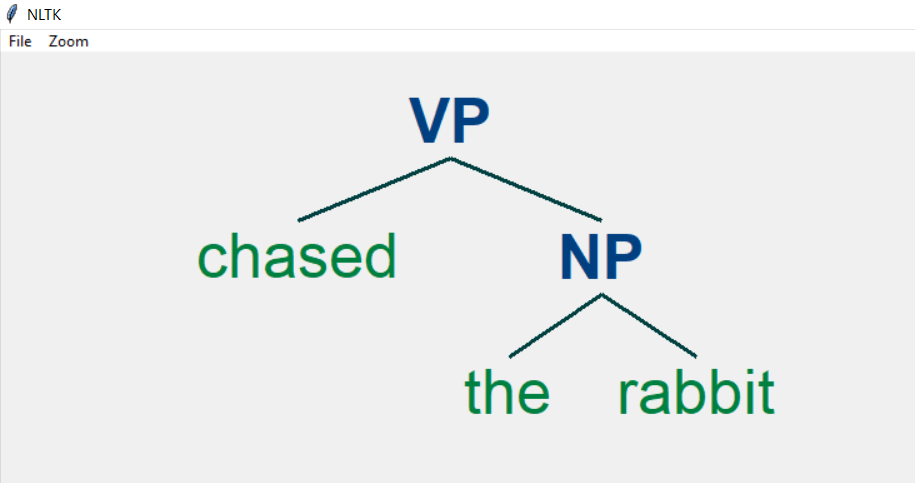

### 4.3   Tree Traversal

In [63]:
def traverse(t):
    try:
        t.label()
    except AttributeError:
        print(t, end=" ")
    else:
        # Now we know that t.node is defined
        print('(', t.label(), end=" ")
        for child in t:
            traverse(child)
        print(')', end=" ")




In [67]:
t = nltk.Tree.fromstring('(S (NP Alice) (VP chased (NP the rabbit)))')
traverse(t)

( S ( NP Alice ) ( VP chased ( NP the rabbit ) ) ) 

## 5   Named Entity Recognition

In [68]:
>>> sent = nltk.corpus.treebank.tagged_sents()[22]
>>> print(nltk.ne_chunk(sent, binary=True))

(S
  The/DT
  (NE U.S./NNP)
  is/VBZ
  one/CD
  of/IN
  the/DT
  few/JJ
  industrialized/VBN
  nations/NNS
  that/WDT
  *T*-7/-NONE-
  does/VBZ
  n't/RB
  have/VB
  a/DT
  higher/JJR
  standard/NN
  of/IN
  regulation/NN
  for/IN
  the/DT
  smooth/JJ
  ,/,
  needle-like/JJ
  fibers/NNS
  such/JJ
  as/IN
  crocidolite/NN
  that/WDT
  *T*-1/-NONE-
  are/VBP
  classified/VBN
  *-5/-NONE-
  as/IN
  amphobiles/NNS
  ,/,
  according/VBG
  to/TO
  (NE Brooke/NNP)
  T./NNP
  Mossman/NNP
  ,/,
  a/DT
  professor/NN
  of/IN
  pathlogy/NN
  at/IN
  the/DT
  (NE University/NNP)
  of/IN
  (NE Vermont/NNP College/NNP)
  of/IN
  (NE Medicine/NNP)
  ./.)


In [69]:
>>> print(nltk.ne_chunk(sent)) 

(S
  The/DT
  (GPE U.S./NNP)
  is/VBZ
  one/CD
  of/IN
  the/DT
  few/JJ
  industrialized/VBN
  nations/NNS
  that/WDT
  *T*-7/-NONE-
  does/VBZ
  n't/RB
  have/VB
  a/DT
  higher/JJR
  standard/NN
  of/IN
  regulation/NN
  for/IN
  the/DT
  smooth/JJ
  ,/,
  needle-like/JJ
  fibers/NNS
  such/JJ
  as/IN
  crocidolite/NN
  that/WDT
  *T*-1/-NONE-
  are/VBP
  classified/VBN
  *-5/-NONE-
  as/IN
  amphobiles/NNS
  ,/,
  according/VBG
  to/TO
  (PERSON Brooke/NNP T./NNP Mossman/NNP)
  ,/,
  a/DT
  professor/NN
  of/IN
  pathlogy/NN
  at/IN
  the/DT
  (ORGANIZATION University/NNP)
  of/IN
  (PERSON Vermont/NNP College/NNP)
  of/IN
  (GPE Medicine/NNP)
  ./.)


## 6   Relation Extraction

In [70]:
>>> IN = re.compile(r'.*\bin\b(?!\b.+ing)')
>>> for doc in nltk.corpus.ieer.parsed_docs('NYT_19980315'):
...     for rel in nltk.sem.extract_rels('ORG', 'LOC', doc,
...                                      corpus='ieer', pattern = IN):
...         print(nltk.sem.rtuple(rel))

[ORG: 'WHYY'] 'in' [LOC: 'Philadelphia']
[ORG: 'McGlashan &AMP; Sarrail'] 'firm in' [LOC: 'San Mateo']
[ORG: 'Freedom Forum'] 'in' [LOC: 'Arlington']
[ORG: 'Brookings Institution'] ', the research group in' [LOC: 'Washington']
[ORG: 'Idealab'] ', a self-described business incubator based in' [LOC: 'Los Angeles']
[ORG: 'Open Text'] ', based in' [LOC: 'Waterloo']
[ORG: 'WGBH'] 'in' [LOC: 'Boston']
[ORG: 'Bastille Opera'] 'in' [LOC: 'Paris']
[ORG: 'Omnicom'] 'in' [LOC: 'New York']
[ORG: 'DDB Needham'] 'in' [LOC: 'New York']
[ORG: 'Kaplan Thaler Group'] 'in' [LOC: 'New York']
[ORG: 'BBDO South'] 'in' [LOC: 'Atlanta']
[ORG: 'Georgia-Pacific'] 'in' [LOC: 'Atlanta']


In [71]:
>>> from nltk.corpus import conll2002
>>> vnv = """
... (
... is/V|    # 3rd sing present and
... was/V|   # past forms of the verb zijn ('be')
... werd/V|  # and also present
... wordt/V  # past of worden ('become)
... )
... .*       # followed by anything
... van/Prep # followed by van ('of')
... """
>>> VAN = re.compile(vnv, re.VERBOSE)
>>> for doc in conll2002.chunked_sents('ned.train'):
...     for rel in nltk.sem.extract_rels('PER', 'ORG', doc,
...                                    corpus='conll2002', pattern=VAN):
...         print(nltk.sem.clause(rel, relsym="VAN"))

VAN("cornet_d'elzius", 'buitenlandse_handel')
VAN('johan_rottiers', 'kardinaal_van_roey_instituut')
VAN('annie_lennox', 'eurythmics')
